First 5 rows of data:
            Series_A  Series_B
2023-01-01  0.496714 -0.702572
2023-01-02 -0.138264 -0.444910
2023-01-03  0.647689  0.325357
2023-01-04  1.523030 -0.539403
2023-01-05 -0.234153  0.567046

Selected Lag Order based on AIC: 2
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 23, Nov, 2025
Time:                     18:53:20
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -1.12563
Nobs:                     88.0000    HQIC:                  -1.29373
Log likelihood:          -177.819    FPE:                   0.244901
AIC:                     -1.40714    Det(Omega_mle):        0.219276
--------------------------------------------------------------------
Results for equation Series_A
                 coefficient       std. error           t-stat            prob
----------------------------------------------------------

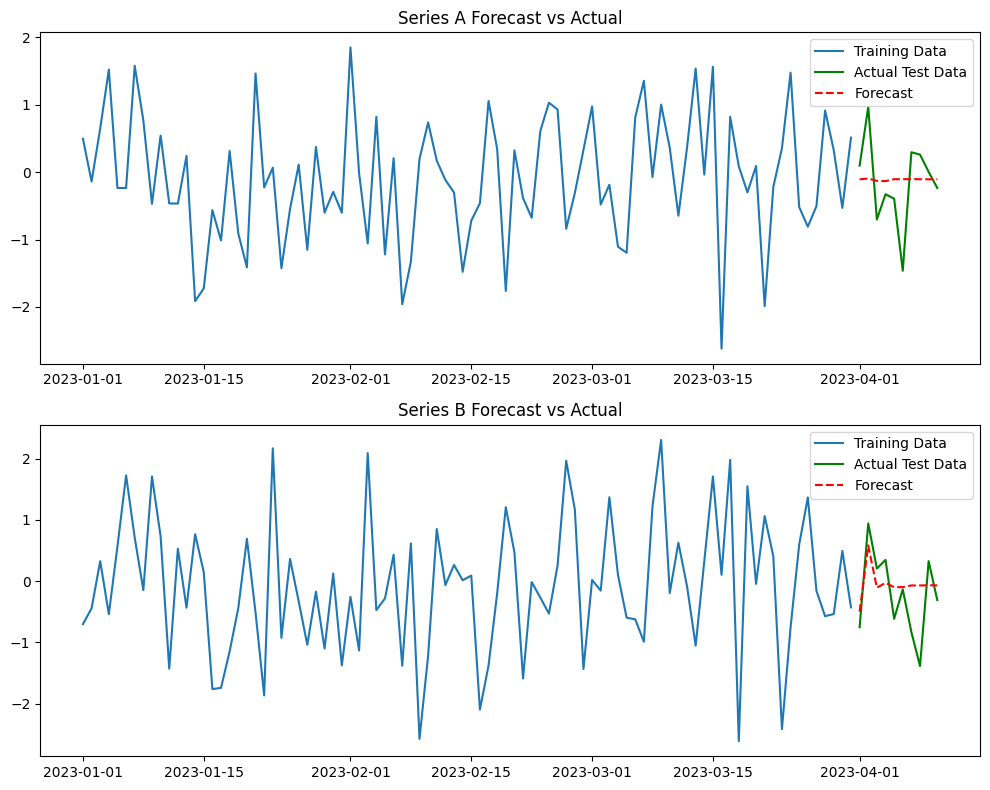

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller

# 1. Generate Synthetic Data (Multivariate)
# -----------------------------------------
np.random.seed(46)
# Create a time range
dates = pd.date_range('2023-01-01', periods=100, freq='D')

# Create two correlated time series (Stationary for this example)
# Series 1: Base signal
data1 = np.random.normal(0, 1, 100)
# Series 2: Influenced by Series 1 with a lag
data2 = np.roll(data1, 2) + np.random.normal(0, 0.5, 100)

# Combine into a DataFrame
df = pd.DataFrame({'Series_A': data1, 'Series_B': data2}, index=dates)

print("First 5 rows of data:")
print(df.head())

#

# 2. Train/Test Split
# -------------------
n_obs = 10 # Number of observations to forecast
df_train, df_test = df[0:-n_obs], df[-n_obs:]

# 3. Initialize and Fit the Model
# -------------------------------
model = VAR(df_train)

# Select the best lag order (p) automatically based on AIC
# We search up to 15 lags
lags_search = model.select_order(maxlags=15)
print(f"\nSelected Lag Order based on AIC: {lags_search.aic}")

# Fit the model using the selected lag
results = model.fit(lags_search.aic)
print(results.summary())

# 4. Forecasting
# --------------
# Get the lag order used by the model
lag_order = results.k_ar

# Input data for forecasting: The last 'p' values from the training set
forecast_input = df_train.values[-lag_order:]

# Forecast for the next n_obs steps
fc = results.forecast(y=forecast_input, steps=n_obs)

# Convert forecast to DataFrame for plotting
df_forecast = pd.DataFrame(fc, index=df.index[-n_obs:], columns=df.columns + '_Forecast')

# 5. Visualization
# ----------------
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# Plot Series A
axes[0].plot(df_train.index, df_train['Series_A'], label='Training Data')
axes[0].plot(df_test.index, df_test['Series_A'], label='Actual Test Data', color='green')
axes[0].plot(df_forecast.index, df_forecast['Series_A_Forecast'], label='Forecast', color='red', linestyle='--')
axes[0].set_title('Series A Forecast vs Actual')
axes[0].legend()

# Plot Series B
axes[1].plot(df_train.index, df_train['Series_B'], label='Training Data')
axes[1].plot(df_test.index, df_test['Series_B'], label='Actual Test Data', color='green')
axes[1].plot(df_forecast.index, df_forecast['Series_B_Forecast'], label='Forecast', color='red', linestyle='--')
axes[1].set_title('Series B Forecast vs Actual')
axes[1].legend()

plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adfuller_test(series, name=''):
    res = adfuller(series)
    print(f'P-value for {name}: {res[1]}')
    if res[1] <= 0.05:
        print("Data is Stationary")
    else:
        print("Data is Non-Stationary (Difference it!)")

adfuller_test(df['Series_A'], name='Series_A')

P-value for Series_A: 1.1655044784188669e-17
Data is Stationary
